In [1]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
import seaborn as sns

## Loading Data

In [2]:
train=pd.read_csv('data/TrainData3.csv')
test=pd.read_csv('data/TargetData3.csv')
train.head()

,TIMESTAMP,POWER,U10,V10,U100,V100
0,20150101 00:00,NaN,NaN,NaN,NaN,NaN
1,20150101 01:00,NaN,6.24102,3.49613,9.73707,4.78492
2,20150101 02:00,NaN,5.62234,4.06239,8.94497,5.71768
3,20150101 03:00,0.666693,5.99531,4.89334,9.52143,6.99094
4,20150101 04:00,NaN,6.90809,4.79099,10.63280,6.75417


### Persistance: "What you see is what you get"

This naive predictor states that future wind production remains the same as the last measured value of power

In [3]:
test["FORECAST"]=train.iloc[-1,:]["POWER"]

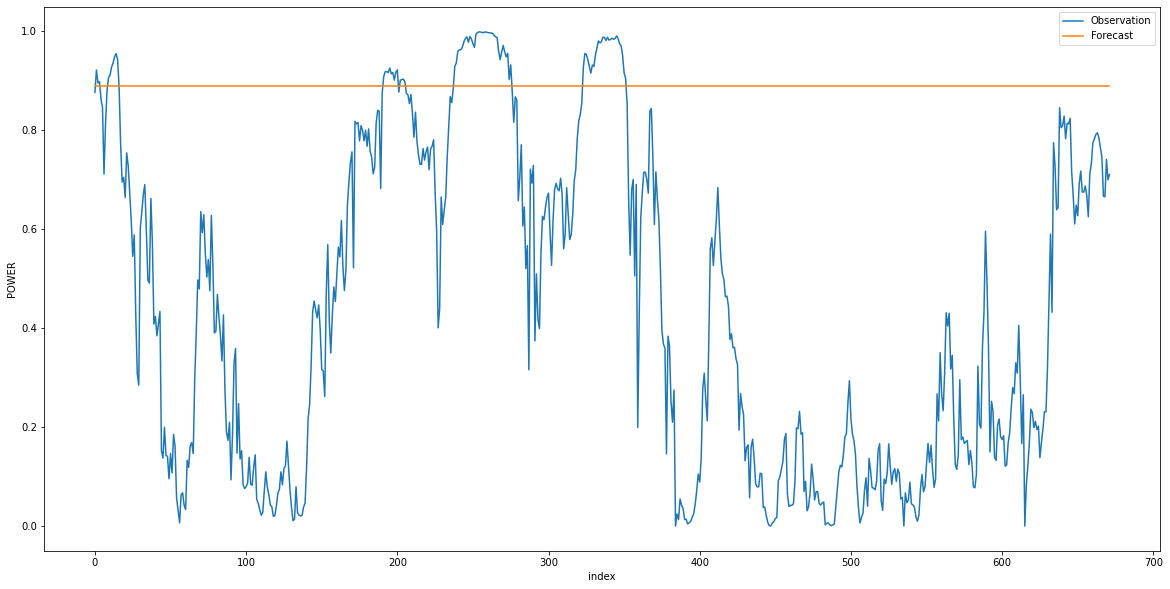

In [4]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data=test.reset_index(),
    x="index", y="POWER", label="Observation",
    markers=True, dashes=False
)
sns.lineplot(
    data=test.reset_index(), label="Forecast",
    x="index", y="FORECAST",
    markers=True, dashes=False
)
plt.legend()
plt.show()

In [5]:
y_true=test["POWER"]
T=len(y_true)
def scores(k,errors):
    test["FORECAST"]=train.iloc[-1,:]["POWER"]
    y_pred=test["FORECAST"]
    errors=y_true-y_pred
    mae=np.sum(np.abs(errors))/T
    rmse=np.sqrt(np.sum(np.square(errors))/T)
    mse=np.sum(np.square(errors))/T
    return {"RMSE":rmse,
            "MSE":mse,
            "MAE":mae}

In [6]:
dict_scores=scores(9,errors)

NameError: name 'errors' is not defined

In [ ]:
scores_vs_lead_times=list(map(lambda k:scores(k,errors),range(1,T+1)))

In [ ]:
rmse_values=[score["RMSE"]for score in scores_vs_lead_times]
mse_values=[score["MSE"]for score in scores_vs_lead_times]
mae_values=[score["MAE"]for score in scores_vs_lead_times]

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(rmse_values,label='RMSE',marker="o",markersize=2)
plt.plot(mse_values,label='MSE',marker="o",markersize=2)
plt.plot(mae_values,label='MAE',marker="o",markersize=2)
plt.legend()
plt.show()

In [ ]:
rmse_values